In [1]:
import matplotlib.pyplot as plt
import qutip as qt
import numpy as np

$$\sum_{i<j}\frac{J_0}{4|i-j|^{\alpha}}(S_+^{(i)} S_-^{(j)}+S_-^{(i)} S_+^{(j)})+B\sum_i S_z^{(i)}+D\sum_i (S_z^{(i)})^2$$

In [ ]:
SPIN = 1    # Ions spin
n = int(2 * SPIN + 1)
_Sp = qt.spin_Jp(SPIN)
_Sm = qt.spin_Jm(SPIN)
_Sx = qt.spin_Jx(SPIN)
_Sy = qt.spin_Jy(SPIN)
_Sz = qt.spin_Jz(SPIN)

N_IONS = 4  # Number of ions
J0 = 1.3094570021973102e3 * 2 * np.pi   # Ising-like Interaction strength
V01 = 200 * 2 * np.pi                   # Local potential on ion 1
V02 = 150 * 2 * np.pi                   # Local potential on ion 2
alpha = 0.36

# Spin operators definition
Sp = [qt.tensor([qt.qeye(n)] * i + [_Sp] + [qt.qeye(n)] * (N_IONS - i - 1)) for i in range(N_IONS)]
Sm = [qt.tensor([qt.qeye(n)] * i + [_Sm] + [qt.qeye(n)] * (N_IONS - i - 1)) for i in range(N_IONS)]
Sz = [qt.tensor([qt.qeye(n)] * i + [_Sz] + [qt.qeye(n)] * (N_IONS - i - 1)) for i in range(N_IONS)]
Sx = [qt.tensor([qt.qeye(n)] * i + [_Sx] + [qt.qeye(n)] * (N_IONS - i - 1)) for i in range(N_IONS)]
Sy = [qt.tensor([qt.qeye(n)] * i + [_Sy] + [qt.qeye(n)] * (N_IONS - i - 1)) for i in range(N_IONS)]

S = np.array([Sx, Sy, Sz])

def H(J0, B, D):
    H = qt.qzero(Sm[0].dims[0])
    for i in range(N_IONS):
        H += B * Sz[i] + D * Sz[i] ** 2
        for j in range(i + 1, N_IONS):
            H += (Sp[i] * Sm[j] + Sm[i] * Sp[j]) * (-J0 * 0.25 / (np.abs(i - j) ** alpha))
    H += V01 * Sz[1] - V02 * Sz[1] ** 2
    return H

In [ ]:
# Grid of B and D values
B = np.linspace(-5, 5, 100)
D = np.linspace(-5, 5, 100)

Mz = np.zeros((len(B), len(D)))          # Total Magnetization along z
gap = np.zeros((len(B), len(D)))         # Energy gap
order = np.zeros((len(B), len(D)))       # Order parameter
overlap_00 = np.zeros((len(B), len(D)))  # Overlap with |0000>

proj_00 = qt.tensor([qt.basis(n, 1), qt.basis(n, 1), qt.basis(n, 1), qt.basis(n, 1)]).proj()

for i in range(len(B)):
    for j in range(len(D)):
        h = H(J0, J0*B[j], J0*D[i])
        sol = h.eigenstates()
        state = sol[1][0]
        energy = sol[0]
        Mz[i, j] = np.sum(qt.expect(Sz, state)) / N_IONS
        gap[i, j] = energy[1] - energy[0]
        overlap_00[i, j] = np.sum(qt.expect(proj_00, state))

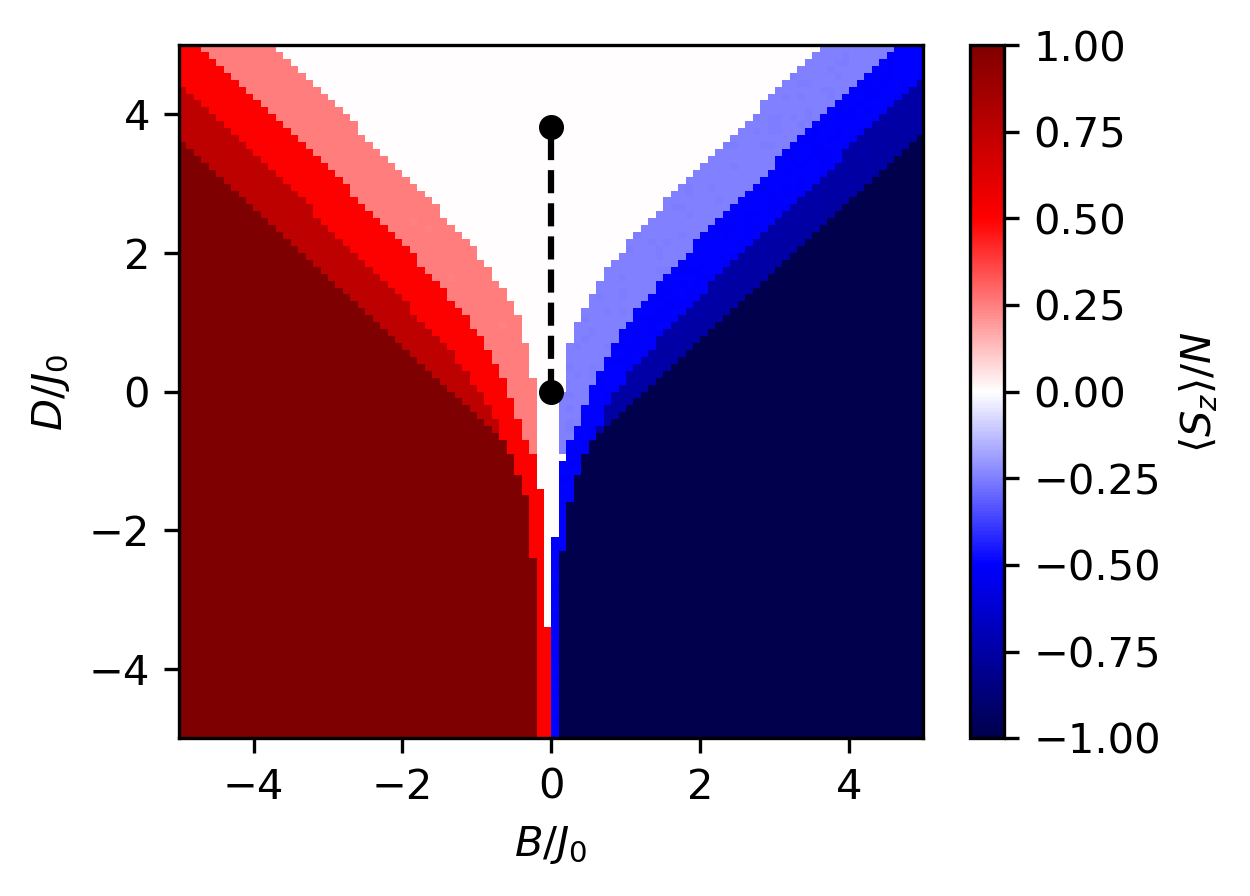

In [ ]:
plt.figure(figsize=(4, 3), dpi=300)
plt.imshow(Mz, extent=(B[0], B[-1], D[0], D[-1]), origin='lower', aspect='auto', cmap='seismic')
plt.colorbar(label=r'$\langle S_z \rangle/N$')
plt.plot(0, 5e3*2*np.pi/J0, 'k.', markersize=10)
plt.plot(0, 0, 'k.', markersize=10)
plt.plot([0, 0], [0, 5e3*2*np.pi/J0], color='k', linestyle='--')
plt.xlabel('$B/J_0$')
plt.ylabel('$D/J_0$')
plt.show()

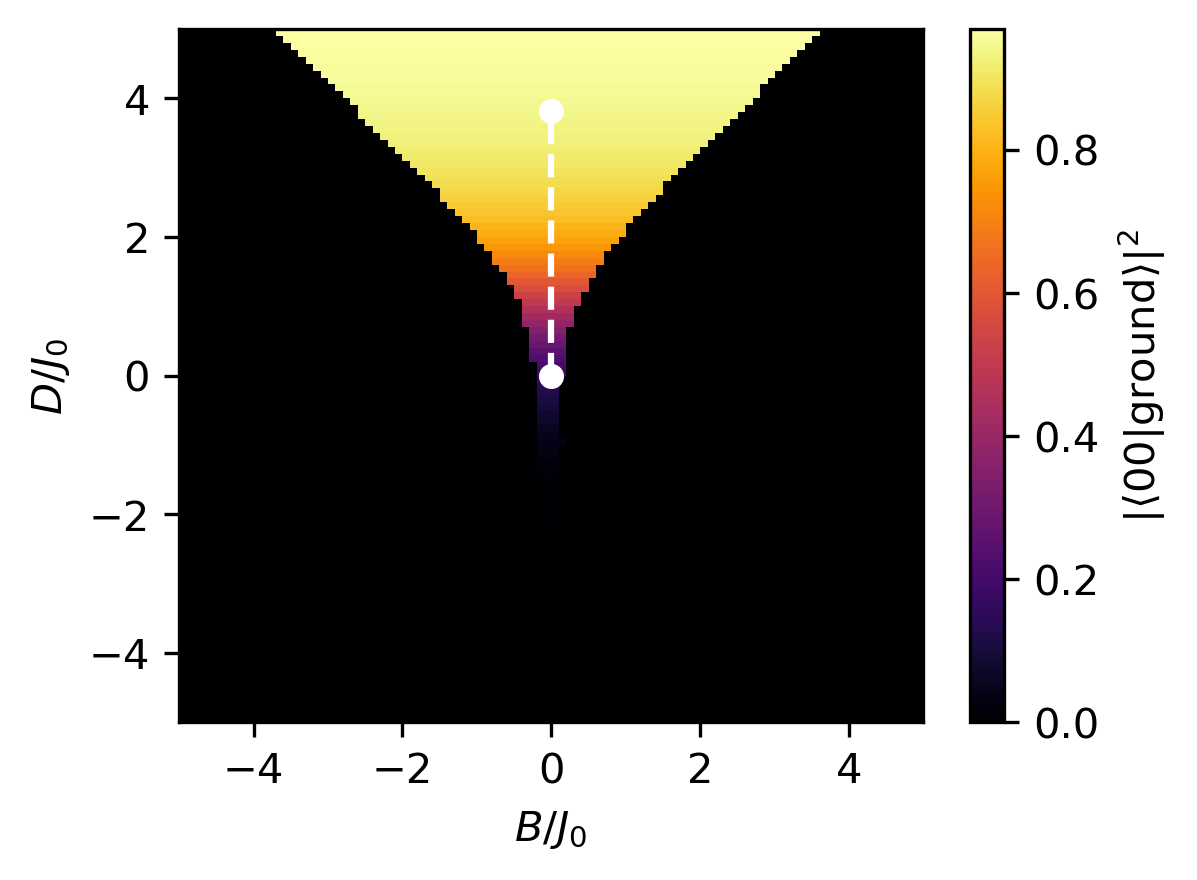

In [5]:
plt.figure(figsize=(4, 3), dpi=300)
plt.imshow(overlap_00, extent=(B[0], B[-1], D[0], D[-1]), origin='lower', aspect='auto', cmap='inferno')
plt.colorbar(label=r'$|\langle 00|\text{ground} \rangle|^2$')
plt.plot(0, 5e3*2*np.pi/J0, 'w.', markersize=10)
plt.plot(0, 0, 'w.', markersize=10)
plt.plot([0, 0], [0, 5e3*2*np.pi/J0], color='w', linestyle='--')
plt.xlabel('$B/J_0$')
plt.ylabel('$D/J_0$')
plt.show()